
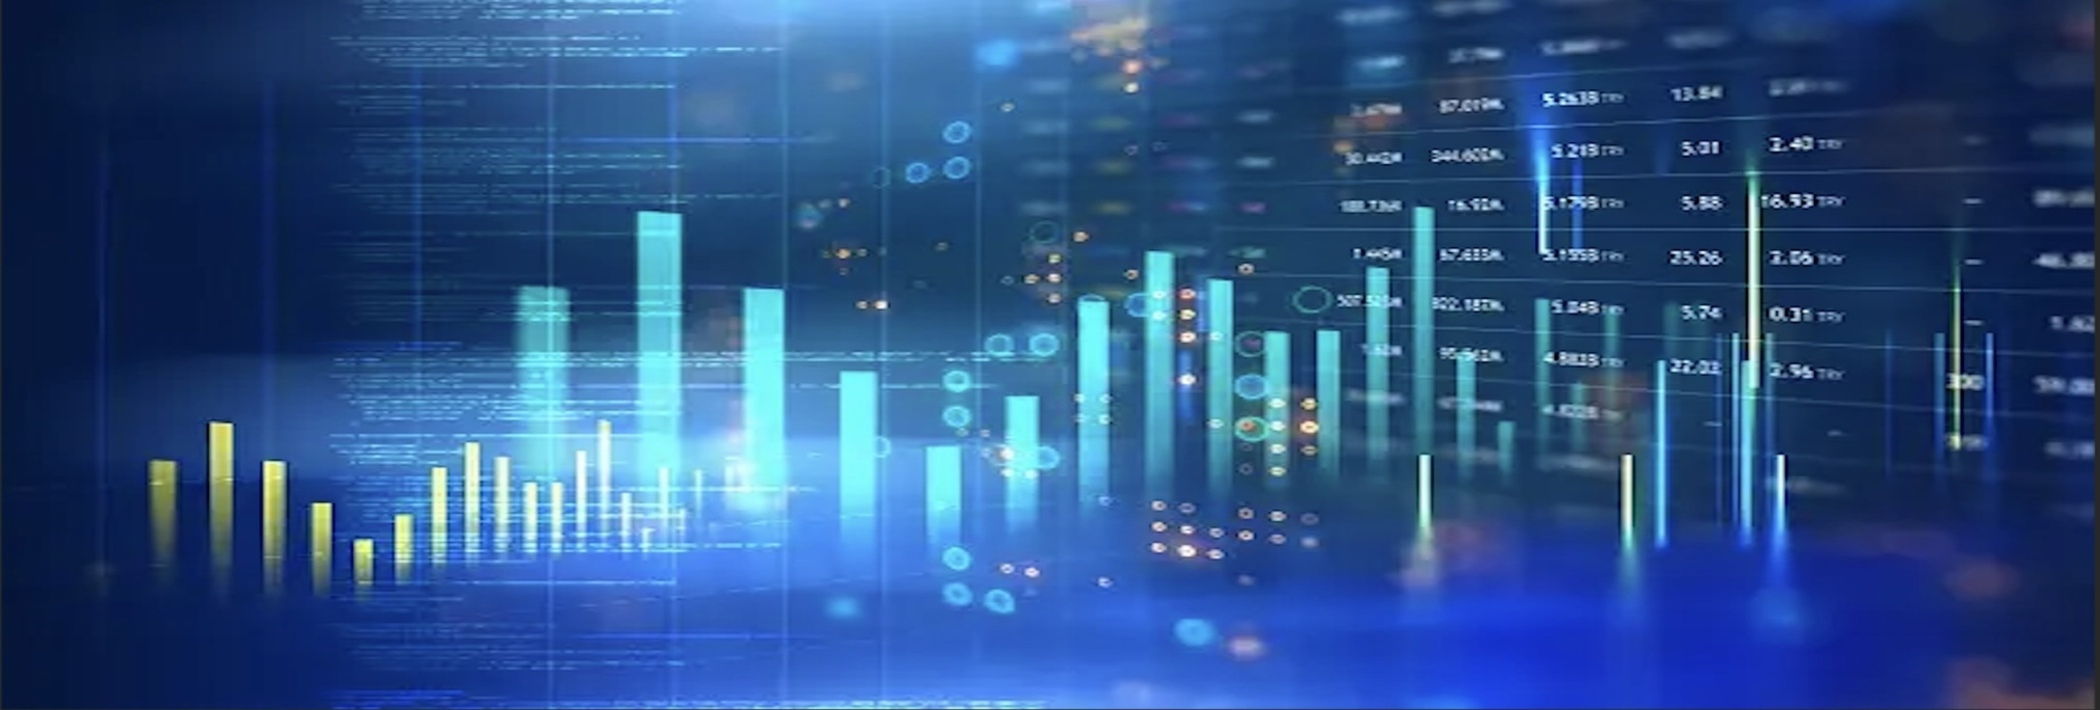
#**Analyzing the Impact of COVID '19 on Different Industries | A Comprehensive Stock Analysis**

###By: Sricharan Mahavadi, Yumeng Tang, Zack Batchelder, Sneha Jayapradeep, Raiymbek Ordabayev, Riya Gupta

In [ ]:
%%html
<marquee style='width: 70%; color: white;'><b>Welcome to BA780 TEAM B07 PROJECT NOTEBOOK</b></marquee>

##**Report Summary:**

- During and after the pandemic, the Energy industry showcased remarkable resilience and growth, appearing unaffected by global occurrences like COVID-19 and the Russia-Ukraine conflict.
- Compared to the Energy sector's significant ascent, the S&P 500 Index displayed an upward trajectory.
- Various sectors, such as Industrials, Utilities, and Technology, registered a positive close from their initial COVID-19 prices, but Energy's performance was notably superior.
- In contrast,  sectors like Real Estate and Consumer Non-Cyclicals recorded diminishing prices throughout the observed period.
- When employing Markowitz's Efficient Frontier for portfolio optimization, a diverse investment strategy emerged, emphasizing areas like Household Appliances, Business Services, Food Manufacturing, and Chemical Specialties.


##**Business Problem Definition:**

We want to show how various industries in response to global disasters, and in this project, we have selected COVID -19 to display this.

Our project is dedicated to understanding the profound impact of the COVID-19 pandemic on various industries by conducting a thorough analysis of stock market data. Specifically, we aim to:

1. **Investigate the stock price variations of industries** before, during and after the end of the COVID-19 pandemic, identifying trends, and assessing the extent of market disruption.
2. **Post-COVID-19 Performance:** Our research will extend beyond the pandemic's immediate effects. We will assess how industries have performed in the post-COVID-19 era, allowing us to measure their resilience and adaptability in the face of ongoing challenges.
3. **Investment Recommendations:** Based on our findings, we will provide insightful recommendations on which industries are most suitable for various types of investment. This will include identifying sectors that have shown stability, growth potential, or unique investment opportunities in the new normal.
4. **Comparative Analysis:** Our analysis will involve comparative studies between industries, enabling us to highlight relative performance and potential cross-sector investment strategies.

**Data Source:**

Yahoo Finance , Refinitiv platforms were web scrapped and the data set was created by Luis Gilch Source link: https://www.kaggle.com/datasets/luisgilch/stock-data-with-industry-information

We also included the covid data to perform an analysis based on the covid 19 to stock relation.

Covid Data source: https://covid.ourworldindata.org/data/owid-covid-data.csv

**Motivation:** The COVID-19 pandemic has brought about unprecedented challenges and disruptions across industries. We are motivated to embark on this project to shed light on how companies navigated these turbulent times. Analyzing stock market data during and after the pandemic will provide valuable insights into the resilience and adaptability of businesses, aiding investors in making informed decisions and policymakers in shaping future strategies.


**Challenges:**

Some of our challenges included dealing with a large dataset that contained similar categorical and numerical columns.

Also, we experienced frequent run time crashes because of our visualizations inputing large quantities of prices and stock dates.

Understanding the underlying aspects in our portfolio creation.


---



DATA DICTIONARY

Column Level Information

| Column Name                | Description                                      |
|----------------------------|--------------------------------------------------|
| **Stock Data**             |                                                  |
| Instrument                  | RIC (Reuters Instrument Code) of the company    |
| Date                        | Date of observation                             |
| Price High                  | Highest price of the day                        |
| Price Open/Price Close      | Open and Close price of the day                 |
| Volume                      | Volume of the stock on that day                |
| **Sector Data**            |                                                  |
| Instrument                  | RIC (Reuters Instrument Code) of the company    |
| Company Common Name         | Common name of the company                      |
| Economic Sector Name        | Name of the economic sector                     |
| Business Sector Name        | Name of the business sector                     |
| Industry Name               | Name of the industry                            |
| Activity Name               | Additional information about company activities|
| Economic and Business Sector Code | Code for economic and business sector   |


Deeper Dive into Variables of the Data Dictionary

| Variable Names               | Readable Variable Name   | Measurement Units | Allowed Values | Definition Of The Variable       | Synonyms (Optional) | Description Of The Variable (Optional) | Other Resources (Optional) |
|-----------------------------|--------------------------|--------------------|-----------------|----------------------------------|---------------------|---------------------------------------|-----------------------------|
| Instrument                   | Instrument               | N/A                | N/A             | RIC of the company               | RIC Code            | Unique identifier for the company      | Company RIC Codes (RIC Directory) |
| Date                         | Date                     | Date               | Date format     | Date of observation             | N/A                 | Date when stock data was recorded     | N/A                         |
| Price High                   | High Price               | Currency (e.g., INR) | Numeric value  | Highest price of the day        | High Price          | Peak stock price on the given day     | N/A                         |
| Price Open/Price Close       | Open/Close Price         | Currency (e.g., INR) | Numeric values | Opening and closing prices       | Opening/Closing Price | Stock prices at the start and end of the day | N/A                     |
| Volume                       | Volume                   | Numeric value      | Numeric value  | Trading volume of the stock     | Trading Volume      | Quantity of shares traded on the day   | N/A                         |
| Company Common Name          | Company Name             | N/A                | N/A             | Common name of the company       | N/A                 | Recognizable name of the company       | N/A                         |
| Economic Sector Name         | Economic Sector          | N/A                | N/A             | Name of the economic sector     | N/A                 | Category of the company's industry    | N/A                         |
| Business Sector Name         | Business Sector          | N/A                | N/A             | Name of the business sector     | N/A                 | Category of the company's operations  | N/A                         |
| Industry Name                | Industry                 | N/A                | N/A             | Name of the industry            | N/A                 | Specific industry of the company      | N/A                         |
| Activity Name                | Activity                 | N/A                | N/A             | Company's specific activities   | N/A                 | Additional details about the company  | N/A                         |
| Economic and Business Sector Code | Sector Code        | N/A                | N/A             | Code for economic and business sector | Sector Code         | Numerical code for sector classification | N/A                     |


## **1. IMPORT THE DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from scipy.optimize import minimize
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column
from bokeh.layouts import gridplot
from scipy.optimize import minimize




**Follow the steps below before you run the notebook:**

1. Navigate to Kaggle.
2. Select 'Sign In' located at the top right.
3. Choose 'Sign in with Google'.
4. Use either your BU or personal account to continue.
5. After signing in, click on your profile picture at the top right.
6. Select 'Profile', then navigate to and select the 'Account' tab, which is located at the far right.
7. Scroll to find 'API' and then select 'Create New Token'.
8. The kaggle.json file will download automatically.
9. Open the exercise Colab file.
10. In Colab, click on the files icon on the left of the screen to open the Files tab.
11. Select 'Upload to Session Storage' (icon with an upward arrow on a file).
12. Upload the downloaded kaggle.json file.

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download luisgilch/stock-data-with-industry-information
! unzip stock-data-with-industry-information.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open stock-data-with-industry-information.zip, stock-data-with-industry-information.zip.zip or stock-data-with-industry-information.zip.ZIP.


In [ ]:
#Alternate way to download data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1a. Data Load:**

The first step is to load the datasets using the pd.read_csv from pandas.


*   stock_data_df has the actual data (fact table)
*   sector_df has the company, industry , industry mapping (dimension table)


In [ ]:
stock_data_df = pd.read_csv('stock_data.csv')
sector_df = pd.read_csv('stock_sector_information.csv')

FileNotFoundError: ignored

In [ ]:
sector_df

### **1b. Data Merge:**

To combine the company, industry, sector and activity information into one dataset, merge stock_data_df and sector_df on the common column "Instrument".

In [ ]:
stocks_df = stock_data_df.merge(sector_df, on='Instrument')

In [ ]:
stocks_df

Also get the covid data to be used for the further analysis and modeling:

In [ ]:
#Define the URL to the COVID-19 data source
covid_data_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

covid_data = pd.read_csv(covid_data_url)

###**Analysis 0.**
Before we jump into our analysis, let us have a look into the effects of COVID globally. Following is a visual analysis of how COVID has impacted our world:

In [ ]:
#covid code


import matplotlib.pyplot as plt
import seaborn as sns

#Bar Plot of Total Cases by Continent
plt.figure(figsize=(10, 6))
sns.barplot(x="continent", y="total_cases", data=covid_data)
plt.xticks(rotation=45)
plt.title("Total COVID-19 Cases by Continent")
plt.show()

#Line Plot of Total Cases Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="total_cases", data=covid_data)
plt.title("Total COVID-19 Cases Over Time")
plt.xticks(rotation=45)
plt.show()

#Box Plot of Stringency Index by Continent
plt.figure(figsize=(10, 6))
sns.boxplot(x="continent", y="stringency_index", data=covid_data)
plt.xticks(rotation=45)
plt.title("Stringency Index by Continent")
plt.show()

# Scatter Plot of GDP per Capita vs. Total Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x="gdp_per_capita", y="total_deaths", data=covid_data)
plt.title("GDP per Capita vs. Total Deaths")
plt.show()

# Histogram of Population Density
plt.figure(figsize=(10, 6))
sns.histplot(covid_data["population_density"].dropna(), kde=True)
plt.title("Population Density Distribution")
plt.show()

# Pie Chart of Tests Units Distribution
plt.figure(figsize=(8, 8))
covid_data['tests_units'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Tests Units Distribution")
plt.show()


# Bar Plot of Continents with Most/Least Cases
most_cases = covid_data.groupby("continent")["total_cases"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_cases.index, y=most_cases.values)
plt.title("Continents with Most Total COVID-19 Cases")
plt.xticks(rotation=45)
plt.show()

least_cases = covid_data.groupby("continent")["total_cases"].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=least_cases.index, y=least_cases.values)
plt.title("Continents with Least Total COVID-19 Cases")
plt.xticks(rotation=45)
plt.show()


### **1c. Data at a Glance**

In [ ]:
stocks_df.info()


In [ ]:
stocks_df.describe()

## **2. Data Cleaning:**

From the above information, we can see that there are a lot of unwanted columns and wrong float types associated with certain columns.

The next step is to clean the data and process it for further analysis.

**Note**:  It is always ideal to maintain a copy of the initial dataset before cleaning and processing steps.

Make a copy of the dataframe stocks_cp to store the initial version of the dataset.

In [ ]:
stocks_cp = stocks_df

In [ ]:
stocks_df.info()

###**2a. Drop Unwanted Columns and Rows**



From the dataset, stocks_df column Unnamed : 0_x was created during the merge and does not serve a purpose. This column will need to be deleted.


In [ ]:
stocks_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

Now, looking at the dataset, we can see that the columns:

TRBC Economic Sector Code, TRBC Business Sector Code, TRBC Industry Group Code, TRBC Industry Code, TRBC Activity Code are redundant columns and at this stage do not provide us with any more relevant information in comparison to TRBC Economic Sector Name, TRBC Business Sector Name, TRBC Industry Group Name, TRBC Industry Name, and TRBC Activity Name.

Hence, these columns will need to be removed.

In [ ]:
stocks_df.drop(columns=['TRBC Economic Sector Code',
                        'TRBC Business Sector Code',
                        'TRBC Industry Group Code',
                        'TRBC Industry Code',
                        'TRBC Activity Code'], inplace=True)

In [ ]:
stocks_df.info()

### **2b. Rename the Columns**

TRBC stands for the "Refinitiv Business Classification" .

This will be difficult for everyone to understand, hence we should make it easier. In order to be concise, we will rename the columns.

In addition, it is good practice to name the columns in lowercase. Naming the columns in lower case makes it easier to read and write code, and ensures consistency throughout the dataset.

In [ ]:
stocks_df = stocks_df.rename(columns={'Instrument': 'ticker',
                        'Date': 'date',
                        'Price High': 'price_high',
                        'Price Close': 'price_close',
                        'Price Open': 'price_open',
                        'Volume': 'volume',
                        'Company Common Name': 'company',
                        'TRBC Economic Sector Name': 'economic_sector',
                        'TRBC Business Sector Name':'business_sector',
                        'TRBC Industry Group Name':'industry_group',
                        'TRBC Industry Name':'industry','TRBC Activity Name':'activity'})

In [ ]:
stocks_df.info()

In [ ]:
stocks_df.head()

### **2c. Change Data Types of Relevant Columns**

From the information above, we can see that the date column is assigned as an object. Similarly, it is advisable to change columns that will be used repetitively from object to category, such as sector name, industry, etc.

Converting objects to category (wherever applicable) can also save memory and run time!

In [ ]:
categorical_columns = ['ticker', 'company', 'economic_sector', 'business_sector', 'industry_group', 'industry', 'activity']

for col in categorical_columns:
    stocks_df[col] = stocks_df[col].astype('category')

stocks_df['date'] = pd.to_datetime(stocks_df['date'])

stocks_df['volume'] = pd.to_numeric(stocks_df['volume'], errors='coerce')

stocks_df.info()

We need to remove the rows that were not applicable to our analysis, which are the rows pertaiing to the dates containing data before 2019 and after 2023.



In [ ]:
stocks_df = stocks_df[stocks_df['date'].dt.year >= 2019]

### **2d.Dealing with Null Values**

If we take a closer look into the dataset, we can find null values in atleast one of the columns.

Let's get more insights on these nulls.



In [ ]:
def stocks_df_info():
    temp = pd.DataFrame(index=stocks_df.columns)
    temp["Datatype"] = stocks_df.dtypes
    temp["Not null values"] = stocks_df.count()
    temp["Null values"] = stocks_df.isnull().sum()
    temp["Percentage of Null values"] = (stocks_df.isnull().mean())*100
    temp["Unique count"] = stocks_df.nunique()
    return temp
stocks_df_info()

A null date value wil not give us any useful information,

We will need to check for cases where the data is null.

In [ ]:
null_date_rows = stocks_df[stocks_df['date'].isnull()]
null_date_rows.head(3)

We can see that, in the rows where date is missing, the price columns as well as the volume columns are empty.

Hence we can conclude that when the dates are null, no relevant information is displayed.

Drop the rows where the date is null.

In [ ]:
stocks_df = stocks_df.dropna(subset=['date'])

In [ ]:
def stocks_df_info():
    temp = pd.DataFrame(index=stocks_df.columns)
    temp["Datatype"] = stocks_df.dtypes
    temp["Not null values"] = stocks_df.count()
    temp["Null values"] = stocks_df.isnull().sum()
    temp["Percentage of Null values"] = (stocks_df.isnull().mean())*100
    temp["Unique count"] = stocks_df.nunique()
    return temp
stocks_df_info()

We can still see nulls in the price columns!

Let's have a look as to see how they are impacting the volume

In [ ]:
price_columns = ['price_open', 'price_high', 'price_close']
total_volume = stocks_df['volume'].sum()

for column in price_columns:
    if stocks_df[column].isnull().any():
        null_count = stocks_df[column].isnull().sum()
        other_price_columns = [col for col in price_columns if col != column]
        other_null_counts = [stocks_df[col].isnull().sum() for col in other_price_columns]
        total_volume_null = stocks_df.loc[stocks_df[column].isnull(), 'volume'].sum()
        percentage_of_total = (total_volume_null / total_volume) * 100
        affected_companies = stocks_df.loc[stocks_df[column].isnull(), 'company'].nunique()
        print(f"{column} nulls: {null_count}")
        for other_col, other_null_count in zip(other_price_columns, other_null_counts):
            print(f"{other_col} nulls: {other_null_count}")
        print(f"Volume reported: {total_volume_null} (Volume as % of total: {percentage_of_total}%)")
        print(f"Companies affected: {affected_companies}\n")

In [ ]:
stocks_df.dropna(inplace=True)

In [ ]:
stocks_df.info()

In [ ]:
stocks_df['daily_return'] = stocks_df['price_open'] - stocks_df['price_close']

stocks_df['mean_price'] = (stocks_df['price_open'] + stocks_df['price_close']) / 2

In [ ]:
stocks_df['year'] = stocks_df['date'].dt.year
stocks_df['month'] = stocks_df['date'].dt.month

In [ ]:
# Categorize Trading Volume (Low, Medium, High)
low_threshold = 10000
high_threshold = 500000
stocks_df['volume_category'] = pd.cut(stocks_df['volume'], bins=[0, low_threshold, high_threshold, float('inf')],
                                      labels=['Low', 'Medium', 'High'], include_lowest=True)

# Calculate Price Change Percentage
stocks_df['price_change_percentage'] = (stocks_df['price_close'] / stocks_df['price_close'].shift(1) - 1) * 100

# Extract Day of the Week
stocks_df['day_of_week'] = stocks_df['date'].dt.day_name()

# Compute Price-to-Volume Ratio
stocks_df['price_to_volume_ratio'] = stocks_df['price_close'] / stocks_df['volume']

# Create Price Change Flags
stocks_df['price_increase_flag'] = (stocks_df['price_close'] > stocks_df['price_close'].shift(1)).astype(int)
stocks_df['price_decrease_flag'] = (stocks_df['price_close'] < stocks_df['price_close'].shift(1)).astype(int)

# Compute Price Moving Averages
stocks_df['price_7day_avg'] = stocks_df['price_close'].rolling(window=7).mean()
stocks_df['price_30day_avg'] = stocks_df['price_close'].rolling(window=30).mean()

In [ ]:
stocks_df.head(5)

In [ ]:
stocks_df.info()

## **3.Exploratory Data Analysis**

### **Analysis 1. How are companies distributed within industries, and how does the number of datapoints within each industry compare to the number of companies in that industry?**

In [ ]:
sector_info = sector_df['Instrument'].groupby(sector_df['TRBC Economic Sector Name']).count().sort_values(ascending=False)

industry_counts = stocks_df['economic_sector'].value_counts()

industry_counts = industry_counts.reindex(sector_info.index)

fig, axes = plt.subplots(2, 1, figsize=(8, 12))


sns.barplot(x=sector_info.index, y=sector_info.values, ax=axes[0])
axes[0].set_title('Number of Companies per Industry')
axes[0].set_xlabel('Name of Industry')
axes[0].set_ylabel('Number of Companies')
axes[0].tick_params(axis='x', rotation=90)

#Bar chart for 'economic_sector' with the same common color palette
sns.barplot(x=industry_counts.index, y=industry_counts.values, ax=axes[1])
axes[1].set_title('Data point Counts per Industry')
axes[1].set_xlabel('Name of the Industry')
axes[1].set_ylabel('Number of Companies')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


**Answer + Analysis:**



- The ‘Number of Companies per Industry’  graph reveals the distribution of the number of companies across the various industries present in our data set.
- The ‘Data point Counts per Industry’ graph reveals the distribution of the number of data points across the various industries.
-  Having a majority one to one correspondence between the companies in the different industries and data point counts signifies that each company in our dataset has a corresponding data point. This is significant because it ensures that our dataset is primarily complete, which is critical for accurate data analysis and helps us certify that our data does not contain missing or duplicate data.












### **Analysis 2. How did price fluctuations occur in the top 5 industries, and what was the relationship between these price changes and trading volume?**

In [ ]:
stocks_df['industry'] = stocks_df['industry'].astype(str)

top_5_industry = stocks_df['industry'].value_counts().head(5).index.tolist()

df_top5 = stocks_df[(stocks_df['industry'].isin(top_5_industry)) & (stocks_df['year'] >= 2019) & (stocks_df['year'] <= 2023)]

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

#Plotting of Price Close Variation
sns.barplot(data=df_top5, x='year', y='price_close', hue='industry', ax=axes[0], errorbar=None)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price Close in $')
axes[0].set_title('Price Close Variation (2019-2023) for Top 5 Industries in millions')
axes[0].legend(title='Industry', loc='upper left', bbox_to_anchor=(1, 1))

#Plotting of Volume Variation
sns.barplot(data=df_top5, x='year', y='volume', hue='industry', ax=axes[1], errorbar=None)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Volume in millions')
axes[1].set_title('Volume Variation (2019-2023) for Top 5 Industries')
axes[1].legend(title='Industry', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


**Answer:** This analysis focuses on the closing prices of the top 5 industries within the timeframe of 2019-2023.

**Key Insights:**


*   **Price Fluctuations**: The Industrial Machinery & Equipment industry  overall had a significant jump in its relative stock prices from around 140 dollars to around 230 dollars, whereas the Real Estate industry had less fluctuations between 2019 and 2023.
*   **Long-term Trends**: Analyzing closing prices helps detect long-term trends in the stock prices of these industries, allowing for insights into their historical performance. This information allows investors to utilize this information to invest strategically in the future.
*  **Volume-Price Relationship:** To analyze the relationship between price changes and trading volume, we can observe that in some cases higher trading volumes coincided with notable price increases. However, further statistical analysis is needed to determine the strength and direction of this relationship.
*   **Industry Variability**: It is important to note that each industry had its unique price and volume dynamics. The relationship between price fluctuations and trading volume may vary among industries.





**Limitation:** While this analysis offers insights into price fluctuations, it does not directly explore the relationship between price changes and trading volume. To investigate the correlation between these factors, additional analysis is required.

### **Analysis 3. How did the volume of stocks traded vary by industry and year?**

In [ ]:
sector_volume_bargraph = sns.catplot(x="economic_sector", y="volume", hue="year", errorbar=None, kind="bar", data=stocks_df);
plt.xticks(rotation=90);
plt.xlabel("Industries");
plt.ylabel("Total Volume (in millions)");
plt.title("Total Volume of Each Industry per Year")

**Answer + Analysis:**

- This volume visual shows that a majority of industries saw its highest trade volume during 2020 in COVID
- As depicted by the graph, the **Energy** sector is the only sector that seemed to continue to grow in trade volume throughout the pandemic
- We can also see that most sectors have not achieved pre-pandemic levels of trade volume yet, as most 2023 volume levels are below 2019 levels
- The sectors that achieved pre-pandemic levels of trade volume include: Energy, Industrials, and Real Estate
- The high volume indicates higher activity of trade within these industries

###**Analysis 4. Top 10 Types of Companies by Monthly Return**

In [ ]:
# Calculate monthly returns for industries
monthly_returns = stocks_df.groupby(['economic_sector', pd.Grouper(key='date', freq='M')])['daily_return'].mean().reset_index()

# Sort the industries by monthly returns in descending order and select the top 10
top_10_industries = monthly_returns.groupby('economic_sector')['daily_return'].mean().nlargest(10).index

# Filter the monthly_returns to include only the top 10 industries
monthly_returns = monthly_returns[monthly_returns['economic_sector'].isin(top_10_industries)]

# Create a bar plot for the top 10 industries
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='daily_return', y='economic_sector', data=monthly_returns, orient='h', order=top_10_industries)

plt.xlabel('Monthly Returns')
plt.ylabel('Industry')
plt.title('Top 10 Industries by Monthly Return')

plt.show()

**Answer + Analysis**

- The following graph depicts the top ten types of companies based on their monthly return in price.
- The companies that are related to Appliances, Tools & Houseware had significantly higher return per month than any other company type.
- This type of company performed almost 4 times better than any other type based on monthly return

###**Analysis 5. How did the stocks within the dataset perform against the S&P 500 Index?**
*According to the following charts, we can see that our sample stock dataset was more vulnerable to the pandemic than the S&P 500 index, based on the large drops in average monthly prices (some even being negative)*\
\
*It is also important to note that the y-axis ticks of our stock data are half the size of the S&P 500, which means that the S&P 500 index price growth was almost double the growth of our sample stocks' prices*


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, gridplot
from bokeh.models import FactorRange
import pandas as pd
import yfinance as yf
import calendar

#Ensure that the date column is in a common timezone
stocks_df['date'] = stocks_df['date'].dt.tz_convert('UTC')
#Filter the dataset to include only rows from January 2019 onwards (generated by Chat GPT)
start_date = pd.Timestamp('2019-01-01').tz_localize('UTC')
stocks_df = stocks_df[stocks_df['date'] >= start_date]

#Create new column for the mean price between 'Price Close' and 'Price Open'
stocks_df['mean_price'] = (stocks_df['price_close'] + stocks_df['price_open']) / 2

#Group data by month and calculate the average price per month
monthly_mean = stocks_df.groupby(stocks_df['date'].dt.strftime('%Y-%m'))['mean_price'].mean().reset_index()

#Calculate the percent change relative to the first month (January 2019)
first_month_mean = monthly_mean.loc[0, 'mean_price']
monthly_mean['percent_change'] = (monthly_mean['mean_price'] - first_month_mean) / first_month_mean * 100

#Create Bokeh figure 'f' for stock data
f = figure(x_range=monthly_mean['date'], title="Monthly Percent Change in Price for Overall Stock Dataset",
           width=800, height=400)

#Plot the percent change data of the stocks as a bar chart in Bokeh
f.vbar(x='date', top='percent_change', source=monthly_mean, legend_label="All Sectors Percent Change",
       width=0.5, color='blue')

#Rotate x-axis labels 90 degrees
f.xaxis.major_label_orientation = "vertical"
#Move the legend to the top left of graph
f.legend.location = "top_left"
#Label x-axis
f.xaxis.axis_label = 'Month'
#Label y-axis
f.yaxis.axis_label = 'Percent Change'

#Load S&P 500 index data (^GSPC) from Yahoo Finance using the same date range as the stock dataset
sp500_symbol = "^GSPC"
sp500_data = yf.download(sp500_symbol, start=start_date)

#Resample the S&P 500 data to match the monthly frequency of the stock dataset (generated by Chat GPT)
sp500_data_resampled = sp500_data.resample('M').mean().reset_index()

#Calculate the percent change relative to the first month (January 2019)
first_month_sp500 = sp500_data_resampled.loc[0, 'Adj Close']
sp500_data_resampled['percent_change'] = (sp500_data_resampled['Adj Close'] - first_month_sp500) / first_month_sp500 * 100

#Create a list of x-axis labels for S&P 500 data based on the month and year of each bar
x_labels_sp500 = sp500_data_resampled['Date'].dt.strftime('%Y-%m').tolist()

#Create a Bokeh figure for the S&P 500 dataset
sp500_f = figure(x_range=FactorRange(*x_labels_sp500), title="S&P 500 Monthly Price Percent Change",
                 width=800, height=400)

#Plot the average percent change data for the S&P 500 as a bar chart in Bokeh figure 'sp500_f'
sp500_f.vbar(x=x_labels_sp500, top=sp500_data_resampled['percent_change'], width=0.5, color='green',
             legend_label="S&P 500 Percent Change", line_color="white")

#Rotate x-axis labels
sp500_f.xaxis.major_label_orientation = "vertical"
#Move legend to top left of chart
sp500_f.legend.location = "top_left"

#Create a grid for the two graphs
grid = gridplot([f, sp500_f], ncols=2)

#Show the Bokeh plots
output_notebook()
show(grid)

### **Analysis 6. How did the price change on a month on month basis happen during each time period?**
*-The following graphs depict the monthly percent change in price by sector in comparison to our first full month in our stock dataset (January 2019)*\
*-The data is divided into pre-pandemic, pandemic, and post-pandemic dates to show with clarity how these events effected price changes*\
*-Also included is a black line to mark the month that the Russia-Ukraine War began, as this is another major world event that effected stock prices*
\
\
**(important to note y-axis percent change ticks on each graph because the scale varies for some sectors)**

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column
from bokeh.layouts import gridplot
import pandas as pd

#Group economic sectors by unique names and call the column 'categories'
categories = stocks_df['economic_sector'].unique()
figures = []

#Define date ranges for the three sections of time (before, during and after Covid))
date_range_1 = (pd.Timestamp('2019-01-01'), pd.Timestamp('2020-02-28'))
date_range_2 = (pd.Timestamp('2020-03-01'), pd.Timestamp('2023-04-30'))
date_range_3 = (pd.Timestamp('2023-04-30'), pd.Timestamp('2023-09-30'))

#Define the marker date of the Russia-Ukraine War (March 2022)
marker_date = pd.Timestamp('2022-03-01')

for category in categories:
    category_data = stocks_df[stocks_df['economic_sector'] == category]

    #Create new column for Mean Price by taking the average of the Price Close and Price Open columns
    category_data['mean_price'] = (category_data['price_close'] + category_data['price_open']) / 2

    #Group the data by month and then calculate average price per month
    monthly_mean = category_data.groupby(category_data['date'].dt.strftime('%Y-%m'))['mean_price'].mean().reset_index()

    #Convert 'date' column into timestamps
    monthly_mean['date'] = pd.to_datetime(monthly_mean['date'])

    #Calculate the percent change in price compared to the first month in our dataset
    first_month_price = monthly_mean['mean_price'].iloc[0]
    monthly_mean['percent_change'] = ((monthly_mean['mean_price'] - first_month_price) / first_month_price) * 100

    #Make a Bokeh figure with the 'date' as the x-axis and add title based on sector (aka category)
    f = figure(x_axis_type="datetime", title=f"Monthly Percent Change in Price for {category}", width=800, height=400)

    #Plot percent change data as a bar chart on the Bokeh figure 'f' for each date range (repeat 3 times)
    f.vbar(x='date', top='percent_change', source=monthly_mean[(monthly_mean['date'] >= date_range_1[0]) & (monthly_mean['date'] <= date_range_1[1])],
           legend_label=f'Pre-Pandemic', width=0.6, color='darkblue')

    f.vbar(x='date', top='percent_change', source=monthly_mean[(monthly_mean['date'] >= date_range_2[0]) & (monthly_mean['date'] <= date_range_2[1])],
           legend_label=f'Covid-19 Pandemic', width=0.6, color='red')

    f.vbar(x='date', top='percent_change', source=monthly_mean[(monthly_mean['date'] >= date_range_3[0]) & (monthly_mean['date'] <= date_range_3[1])],
           legend_label=f'Post Pandemic', width=0.6, color='darkgreen')

    #Add a vertical line at the start of March 2022 for start of war
    f.line([marker_date, marker_date], [0, 100], line_width=2, line_color='black', legend_label='Russia-Ukraine War')

    #Label x-axis and y-axis
    f.xaxis.axis_label = 'Date'
    f.yaxis.axis_label = 'Percent Change'

    #Set the legend location to top left of each graph
    f.legend.location = 'top_left'

    figures.append(f)

#Create grid layouts for each row
grid1 = gridplot(figures, ncols=3, width=400, height=400)

# Combine the grid layouts into a single column layout
layout = column(grid1)

# Show the Bokeh plots
output_notebook()
show(layout)
#Remove caveats for making a copy of a sliced DataFrame (ChatGPT suggestion)
pd.set_option('mode.chained_assignment', None)

**Answer + Analysis:**

- We can see the various industries and their performance from before, during and after the covid pandemic. We have added the Russian-Ukraine war maker to understand the impact of world events on various stock prices.
- In every industry we can see a steep drop in the prices during the month when covid pandemic started.
- We also see a drop down of prices for most industries when the Russian-Ukraine war started but it was not as impactful as the covid pandemic.
- Energy industry was the least affected by the pandemic as well as the war.

###**Analysis 7. Give a deeper analysis for all the industries with respect to the moving averages.**

In [ ]:
sector_dropdown = widgets.Dropdown(
    options=['All'] + list(stocks_df['economic_sector'].cat.categories),
    value='All',
    description='Select Economic Sector:'
)

display(sector_dropdown)

def update_plot(selected_sector):
    if selected_sector == 'All':
        sector_data = stocks_df
        title = 'Moving Averages for Industries'
    else:
        sector_data = stocks_df[stocks_df['economic_sector'] == selected_sector]
        title = f'Moving Averages for {selected_sector} Sector'

    sector_agg = sector_data.groupby('date')['price_open'].mean().reset_index()
    sector_agg['MA20'] = sector_agg['price_open'].rolling(20).mean()
    sector_agg['MA50'] = sector_agg['price_open'].rolling(50).mean()

    plt.figure(figsize=(12, 8))
    plt.plot(sector_agg['date'], sector_agg['MA20'], label='MA over 20 days')
    plt.plot(sector_agg['date'], sector_agg['MA50'], label='MA over 50 days')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive_output = widgets.interactive_output(update_plot, {'selected_sector': sector_dropdown})


display(interactive_output)

**Answers + Analysis:**

- A drop down chart with all the industries and their 20 and 50 day moving averages is shown above.
- The 20 day moving average shows a more short-term view of the average change in stock price, while the 50 day moving average is a medium-time period for how the stock performs.
- Overall, the individual industries perform in a similar manner to the graph of the combined dataset as a whole.
- However, we can see that the moving average for the energy sector is the most positive and consistent among the other industries.

###**Analysis 8. What are the top performing companies for each industry?**

In [ ]:
def get_top_companies_by_sector(data, year_start, year_end, top_n):
    #Filter data for the specified years
    data_filtered = data[(data['date'].dt.year >= year_start) & (data['date'].dt.year <= year_end)]

    #Group the data by 'economic_sector' and 'company'
    grouped = data_filtered.groupby(['economic_sector', 'company'])

    #Calculate the lowest price in year_start and the highest price in year_end for each company
    lowest_price = grouped['price_close'].min()
    highest_price = grouped['price_close'].max()

    #Calculate the price difference between year_start and year_end
    price_difference = highest_price - lowest_price

    #Create a DataFrame to store the results, including company and sector
    result = pd.DataFrame({
        'Company': price_difference.index.get_level_values('company'),
        'Sector': price_difference.index.get_level_values('economic_sector'),
        'Price Difference': price_difference.values,
    })

    #Sort the DataFrame by 'economic_sector' and then by 'Price Difference'
    result_sorted = result.sort_values(by=['Sector', 'Price Difference'], ascending=[True, False])

    #Get the top 5 companies with the highest price difference for each sector
    top_companies = result_sorted.groupby('Sector').head(top_n)

    #Reset the index
    top_companies.reset_index(drop=True, inplace=True)

    return top_companies

#Define the years and top N companies
year_start = 2019
year_end = 2023
top_n = 5

# Get the top 5 companies for all sectors
top_companies = get_top_companies_by_sector(stocks_df, year_start, year_end, top_n)

top_companies

import plotly.graph_objects as go

# Group the data by 'economic_sector' and calculate the maximum price difference for each company.
sector_groups = top_companies.groupby('Sector')

# Create an empty figure to add traces for each sector
fig = go.Figure()

# Define the list of sectors for the dropdown
sector_list = top_companies['Sector'].unique()

for sector, group in sector_groups:
    for _, row in group.iterrows():
        company = row['Company']
        sector_name = row['Sector']
        company_data = stocks_df[(stocks_df['economic_sector'] == sector_name) & (stocks_df['company'] == company)]

        trace = go.Scatter(
            x=company_data['date'],
            y=company_data['price_close'],
            name=f'{company} - {sector_name}',
        )
        fig.add_trace(trace)

# Add a dropdown menu to select economic sectors
buttons = [
    dict(
        label=sector,
        method="update",
        args=[{"visible": [sector in trace.name for trace in fig.data]}],
    )
    for sector in sector_list
]

# Set the initial visibility of traces
visible_initial = [True if sector == sector_list[0] else False for sector in sector_list]

for trace, vis in zip(fig.data, visible_initial):
    trace.visible = vis

fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            showactive=True,
            buttons=buttons,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top",
        )
    ],
    title="Price Variation Over Time for Top Companies in Each Industry",
    xaxis_title="Date",
    yaxis_title="Price Close",
)

# Show the interactive plot
fig.show()

**Answers + Analysis:**


*   This drop down graph shows the top 5 companies for each industry within the dataset.
*   Their price performance is shown based on price close data and allows us to compare the best performing stocks within industries.
*   We can see a fair amount of volatility among the top stocks, but the best performances can be seen with continuous growth even throughout the Covid pandemic.
*   Once again, the Energy sector appears to have the only stocks that show continuous growth throughout the time period and seem to resist impacts of global events.








###**Analysis 9. How did the Energy industry perform on average?**

In [ ]:
from bokeh.plotting import figure, show, output_notebook
import pandas as pd
import yfinance as yf
from bokeh.layouts import gridplot

# Ensure that the date column is in a common timezone
stocks_df['date'] = stocks_df['date'].dt.tz_convert('UTC')

# Filter the dataset to include only rows from January 2019 onwards
start_date = pd.Timestamp('2019-01-01').tz_localize('UTC')
stocks_df = stocks_df[stocks_df['date'] >= start_date]

# Create new column for the mean price between 'Price Close' and 'Price Open'
stocks_df['mean_price'] = (stocks_df['price_close'] + stocks_df['price_open']) / 2

# Filter the dataset for the 'Energy' sector
energy_df = stocks_df[stocks_df['economic_sector'] == 'Energy']

# Group data by month and calculate the average price per month for the Energy sector
monthly_mean_energy = energy_df.groupby(energy_df['date'].dt.strftime('%Y-%m'))['mean_price'].mean().reset_index()

# Calculate the percent change relative to the first month (January 2019) for the Energy sector
first_month_energy = monthly_mean_energy.loc[0, 'mean_price']
monthly_mean_energy['percent_change'] = (monthly_mean_energy['mean_price'] - first_month_energy) / first_month_energy * 100

# Create Bokeh figure 'energy_f' for the Energy sector data
energy_f = figure(x_range=monthly_mean_energy['date'], title="Monthly Percent Change in Price for Energy Sector",
                  width=800, height=400)

# Plot the percent change data of the Energy sector as a bar chart in Bokeh
energy_f.vbar(x='date', top='percent_change', source=monthly_mean_energy, legend_label="Energy Sector Percent Change",
              width=0.5, color='blue')

# Rotate x-axis labels 90 degrees
energy_f.xaxis.major_label_orientation = "vertical"
# Move the legend to the top left of the graph
energy_f.legend.location = "top_left"
# Label x-axis
energy_f.xaxis.axis_label = 'Month'
# Label y-axis
energy_f.yaxis.axis_label = 'Percent Change'

# Load S&P 500 index data (^GSPC) from Yahoo Finance using the same date range as the stock dataset
sp500_symbol = "^GSPC"
sp500_data = yf.download(sp500_symbol, start=start_date)

# Resample the S&P 500 data to match the monthly frequency of the stock dataset
sp500_data_resampled = sp500_data.resample('M').mean().reset_index()

# Calculate the percent change relative to the first month (January 2019) for the S&P 500
first_month_sp500 = sp500_data_resampled.loc[0, 'Adj Close']
sp500_data_resampled['percent_change'] = (sp500_data_resampled['Adj Close'] - first_month_sp500) / first_month_sp500 * 100

# Create a list of x-axis labels for S&P 500 data based on the month and year of each bar
x_labels_sp500 = sp500_data_resampled['Date'].dt.strftime('%Y-%m').tolist()

# Create Bokeh figure 'sp500_f' for the S&P 500 dataset
sp500_f = figure(x_range=x_labels_sp500, title="S&P 500 Monthly Price Percent Change",
                 width=800, height=400)

# Plot the average percent change data for the S&P 500 as a bar chart in Bokeh figure 'sp500_f'
sp500_f.vbar(x=x_labels_sp500, top=sp500_data_resampled['percent_change'], width=0.5, color='green',
             legend_label="S&P 500 Percent Change", line_color="white")

# Rotate x-axis labels
sp500_f.xaxis.major_label_orientation = "vertical"
# Move the legend to the top left of the chart
sp500_f.legend.location = "top_left"

# Add x-axis label
sp500_f.xaxis.axis_label = 'Month'

# Add y-axis label
sp500_f.yaxis.axis_label = 'Percent Change'

# Add a black line for the start of COVID-19 in March 2020 to both graphs
energy_f.segment(x0=['2020-03'], y0=0, x1=['2020-03'], y1=400, line_width=2, line_color='black', legend_label='Start of COVID-19')
sp500_f.segment(x0=['2020-03'], y0=0, x1=['2020-03'], y1=400, line_width=2, line_color='black', legend_label='Start of COVID-19')


# Show the Bokeh plot
output_notebook()
show(energy_f)
show(sp500_f)

**Answer + Analysis**

- The graphical representation provides a clear indication of the Energy sector's superior performance in comparison to the S&P 500 Index.

- In the aftermath of the COVID-19 pandemic, the Energy sector exhibited a remarkable surge, with a noteworthy rise of approximately 300% in monthly price change within a year. This substantial increase underscores the sector's dynamic growth during this period.

- Conversely, the S&P 500 Index experienced a comparatively modest increase of 70% in monthly price percent change over the same one-year duration.

###**Analysis 10. How did the top companies in the energy industry perform with respect to the S&P 500?**

In [ ]:
import yfinance as yf


# Filter the DataFrame to include only rows in the 'Energy' sector
energy_sector_df = stocks_df[stocks_df['economic_sector'] == 'Energy']

# Calculate the monthly price percent change for each company
energy_sector_df['price_percent_change'] = energy_sector_df.groupby('company')['price_close'].pct_change()

# Calculate the total price percent change for each company
company_percent_change = energy_sector_df.groupby('company')['price_percent_change'].sum().reset_index()

# Sort the companies by total percent change in descending order
top_5_companies = company_percent_change.sort_values(by='price_percent_change', ascending=False).head(5)

# Load S&P 500 data from Yahoo Finance for the period from 2019 to 2023
spglobal = yf.Ticker("^GSPC")
spglobal_data = spglobal.history(start="2019-01-01", end="2023-09-30")

# Calculate the monthly price percent change for the S&P 500
spglobal_data['price_percent_change'] = spglobal_data['Close'].pct_change()

# Calculate the total price percent change for the S&P 500
spglobal_total_change = spglobal_data['price_percent_change'].sum()

# Create a bar plot to compare the total price percent change
plt.figure(figsize=(10, 6))

# Plot the total price percent change for the top 5 Energy sector companies
plt.bar(top_5_companies['company'], top_5_companies['price_percent_change'], label='Energy Sector Companies')

# Plot the total price percent change for the S&P 500
plt.bar('S&P 500', spglobal_total_change, label='S&P 500', color='red')

plt.title("Total Price Percent Change for Top 5 Energy Industry Companies vs. S&P 500 (2019-2023)")
plt.xlabel('Company / Index')
plt.ylabel('Total Price Percent Change')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Answer + Analysis**
*   Looking specifically at the Energy industry, we have identified the top 5 companies in overall percent change in price comparing the first day to the last day
*   We have displayed this percent increase (1=100%) in comparison to the S&P 500 index to show the dramatic increases in price that this industry experienced


*  The top company performed almost 5 times as well as the S&P 500
*   The 5th best company still performed twice as well as the index







###**Analysis 11. How did the various industries perform during the COVID-19 Pandemic?**

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column
from bokeh.layouts import gridplot
import pandas as pd

# Group economic sectors by unique names and call the column 'categories'
categories = stocks_df['economic_sector'].unique()
figures = []

# Define date ranges for the three sections as timestamps
date_range_2 = (pd.Timestamp('2020-03-01'), pd.Timestamp('2023-04-30'))  # Adjusted date range for the Covid-19 period

# Define the marker date (March 2022)
marker_date = pd.Timestamp('2022-03-01')

# Create a y_range to share across all figures
y_range = (-25, 400)

for category in categories:
    category_data = stocks_df[stocks_df['economic_sector'] == category]

    # Create new column for Mean Price by taking the average of the Price Close and Price Open columns
    category_data['mean_price'] = (category_data['price_close'] + category_data['price_open']) / 2

    # Group data by month and then calculate average price for each month
    monthly_mean = category_data.groupby(category_data['date'].dt.strftime('%Y-%m'))['mean_price'].mean().reset_index()

    # Convert 'Date' column to timestamps
    monthly_mean['date'] = pd.to_datetime(monthly_mean['date'])

    # Calculate percent change compared to the first month
    first_month_price = monthly_mean['mean_price'].iloc[0]
    monthly_mean['percent_change'] = ((monthly_mean['mean_price'] - first_month_price) / first_month_price) * 100

    # Make a Bokeh figure with the 'Date' as the range of the x-axis and add title based on sector (aka category)
    f = figure(x_axis_type="datetime", y_range=y_range, title=f"Monthly Percent Change in Price for {category}", width=800, height=400)

    # Plot percent change data as a line chart on the Bokeh figure 'f' for the Covid-19 period
    f.line(x='date', y='percent_change', source=monthly_mean[(monthly_mean['date'] >= date_range_2[0]) & (monthly_mean['date'] <= date_range_2[1])],
           line_width=2, line_color='red', legend_label=f'Covid-19 Pandemic')

    f.xaxis.axis_label = 'Date'    # Label x-axis as "Date"
    f.yaxis.axis_label = 'Percent Change'   # Label y-axis

    # Set the legend location to top left
    f.legend.location = 'top_left'

    figures.append(f)   # add Bokeh figure (f) to the Bokeh line chart

# Create grid layouts for each row
grid1 = gridplot(figures, ncols=3, width=400, height=400)

# Combine the grid layouts into a single column layout
layout = column(grid1)

# Show the Bokeh plots
output_notebook()
show(layout)

**Answer + Analysis**


*   This graph shows the monthly percent change in price as a time series analysis for each industry
*   We can see that the following companies ended above their original price at the start of Covid: Industrials, Utilities, Energy, Basic Materials, Financials, Technology and Healthcare
*   However, the Energy industry really stands out in this display because of its enormous growth (over 400% at some points) throughout the Covid pandemic



###**Analysis 12. Top 3 vs. Bottom 3 Industries**

In [ ]:
# Create a dictionary to store the percent change for each sector
percent_change_dict = {}

for category in categories:
    category_data = stocks_df[stocks_df['economic_sector'] == category]

    # Create a new column for Mean Price by taking the average of the Price Close and Price Open columns
    category_data['mean_price'] = (category_data['price_close'] + category_data['price_open']) / 2

    # Group data by month and then calculate average price for each month
    monthly_mean = category_data.groupby(category_data['date'].dt.strftime('%Y-%m'))['mean_price'].mean().reset_index()

    # Convert 'Date' column to timestamps
    monthly_mean['date'] = pd.to_datetime(monthly_mean['date'])

    # Calculate percent change compared to the first month
    first_month_price = monthly_mean['mean_price'].iloc[0]
    monthly_mean['percent_change'] = ((monthly_mean['mean_price'].iloc[-1] - first_month_price) / first_month_price) * 100

    # Store the percent change in the dictionary
    percent_change_dict[category] = monthly_mean['percent_change'].iloc[-1]

# Find the top 3 sectors with the highest percent change
bottom_3_sectors = sorted(percent_change_dict, key=percent_change_dict.get, reverse=True)[6:9]
top_3_sectors = sorted(percent_change_dict, key=percent_change_dict.get, reverse=True)[:3]

# Create a combined bar chart for the top 3 and bottom 3 sectors
fig, ax = plt.subplots(figsize=(12, 6))

# Add a reference line at 0
ax.axhline(0, color='black', linewidth=0.5, linestyle='-')

# Bar graph for the top 3 sectors
top_bars = ax.bar(top_3_sectors, [percent_change_dict[sector] for sector in top_3_sectors], color='darkblue', label='Top 3 Sectors')

# Bar graph for the bottom 3 sectors
bottom_bars = ax.bar(bottom_3_sectors, [percent_change_dict[sector] for sector in bottom_3_sectors], color='red', label='Bottom 3 Sectors')

ax.set_title("Top 3 vs. Bottom 3 Sectors by Percent Change in Price")
ax.set_ylabel("Percent Change (%)")
ax.tick_params(axis='x', rotation=45)
ax.legend()

# Add labels to each bar
for bar in top_bars + bottom_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Answer + Analysis**


*   The Energy industry performs supremely well compared to every other industry as we can see by its overall price percent increase of 240%.
*   The runner-up industries of Industrials and Technology pale in comparison with 35% and 29% increase in average price during the time frame.
*   Meanwhile, the Real Estate and Consumer Non-Cyclicals performed very poorly, decreasing in overall price during the years of the dataset
*   Healthcare is also included in the bottom 3 industries, but still performs positively overall





###**Analysis 13 - Optimal Investment Portfolio**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# 1. Prepare the Data
# Calculate expected returns and covariance matrix from historical returns
returns = monthly_returns.pivot(index='date', columns='economic_sector', values='daily_return')
expected_returns = returns.mean()
cov_matrix = returns.cov()

# 2. Create Random Portfolios
num_portfolios = 10000
results = np.zeros((4, num_portfolios))
risk_free_rate = 0.03

portfolio_weights = []  # Store portfolio weights separately

for i in range(num_portfolios):
    weights = np.random.random(len(expected_returns))
    weights /= np.sum(weights)

    portfolio_return = np.sum(expected_returns * weights)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = (portfolio_return - risk_free_rate) / portfolio_stddev
    portfolio_weights.append(weights)  # Store the weights in a list

# 3. Find the Optimal Portfolio
sharpe_ratio = results[2]
optimal_portfolio_index = sharpe_ratio.argmax()
optimal_portfolio_return = results[0, optimal_portfolio_index]
optimal_portfolio_stddev = results[1, optimal_portfolio_index]
optimal_portfolio_weights = portfolio_weights[optimal_portfolio_index]

# 4. Calculate the efficient frontier
rf_x = np.linspace(expected_returns.min(), expected_returns.max(), 100)
rf_y = risk_free_rate + (rf_x - 0)

sharpe_ratios = (results[0] - risk_free_rate) / results[1]

efficient_frontier_returns = []
efficient_frontier_stddevs = []

for target_return in rf_x:
    candidate_portfolios = results[:, sharpe_ratios >= (target_return - risk_free_rate)]

    if len(candidate_portfolios[0]) == 0:
        continue

    best_portfolio_index = candidate_portfolios[2].argmax()

    efficient_frontier_returns.append(candidate_portfolios[0, best_portfolio_index])
    efficient_frontier_stddevs.append(candidate_portfolios[1, best_portfolio_index])

efficient_frontier_returns = []
efficient_frontier_stddevs = []

for target_return in rf_x:
    candidate_portfolios = results[:, sharpe_ratios >= (target_return - risk_free_rate)]

    if len(candidate_portfolios[0]) > 0:
        best_portfolio_index = candidate_portfolios[2].argmax()
        efficient_frontier_returns.append(candidate_portfolios[0, best_portfolio_index])
        efficient_frontier_stddevs.append(candidate_portfolios[1, best_portfolio_index])

# 5. Plot the Data
plt.figure(figsize=(12, 8))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier and Optimal Portfolio')

plt.plot(rf_x, rf_y, linestyle='--', label='Risk-Free Rate', color='green')
plt.scatter(optimal_portfolio_stddev, optimal_portfolio_return, c='red', marker='*', s=100, label='Optimal Portfolio')

# Plot the efficient frontier line
plt.plot(efficient_frontier_stddevs, efficient_frontier_returns, linestyle='-', color='blue', linewidth=2, label='Efficient Frontier')

plt.legend()
plt.show()

# Print the key statistics of the optimal portfolio
print("Optimal Portfolio Statistics:")
print(f"Expected Return: {optimal_portfolio_return:.4f}")
print(f"Standard Deviation (Risk): {optimal_portfolio_stddev:.4f}")

# Print the weights of each asset in the optimal portfolio
optimal_portfolio_weights_dict = {
    asset: weight for asset, weight in zip(expected_returns.index, optimal_portfolio_weights)
}
print("Optimal Portfolio Weights:")
for asset, weight in optimal_portfolio_weights_dict.items():
    print(f"{asset}: {weight:.4f}")

# Calculate the sum of portfolio weights
portfolio_weights_sum = sum(optimal_portfolio_weights)

# Print the sum of portfolio weights
print(f"Sum of Portfolio Weights: {portfolio_weights_sum:.4f}")


**Answer + Analysis**

This graph visualizes Markowitz Portfolio Optimization and the Efficient Frontier on how different portfolios can be constructed and evaluated based on risk and return.

The scatter plot is color-coded, with the color of each point indicating the Sharpe Ratio for evaluating the risk-adjusted return of a portfolio. Darker colors represent higher Sharpe Ratios, signifying portfolios with superior risk-adjusted returns.

A critical reference point in the graph is the green dashed line labeled "Risk-Free Rate." This line represents the risk-free rate of return, 0.03, the interest an investor would expect from an absolutely risk-free investment over a specified period of time.

The red star marker on the graph designates the “Optimal Portfolio,” with maximizing the Sharpe Ratio and signifying the best risk-adjusted return.

With a total investment, the expected return is calculated at 0.4941 with standard deviation (risk) of 0.6470, providing a promising potential for positive returns.

### **Analysis 14. Portfolio Analysis - What would an ideal portfolio combination look like for an investor?**

In [ ]:
#Based on our best output we have taken the following values for portfolio
industry_allocation = {
    'Consumer Cyclicals': 49.01,
    'Energy': 28.45,
    'Technology': 9.39,
    'Real Estate': 0.1,
    'Healthcare': 6.23
}

# Enter the investment amount
investment_amount = widgets.FloatText(value=10000, description='Investment Amount:')
display(investment_amount)

def update_allocation(change):
    allocation = {}
    total_investment = investment_amount.value
    for industry, percentage in industry_allocation.items():
        allocation[industry] = total_investment * percentage

    create_pie_chart(allocation)

investment_amount.observe(update_allocation, 'value')

def create_pie_chart(allocation):
    plt.figure(figsize=(8, 8))
    plt.pie(allocation.values(), labels=allocation.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Investment Portfolio Allocation')
    plt.axis('equal')
    plt.show()

update_allocation(None)

**Answer + Analysis:**

What sets this portfolio apart is its sector-specific allocation, showcasing a keen focus on diversification and risk mitigation. Within the portfolio, key economic sectors are thoughtfully selected to align with the investor's financial goals and risk tolerance. These sectors include Consumer Cyclicals with a weight of 52.6%, Energy at 30.5%, Technology for 10.1%, and Healthcare weighing in at 6.7%. These sector-specific weights signify a balanced allocation that spans multiple sectors, reducing concentration risk and enhancing overall portfolio resilience.

## **5.Conclusions and Next Steps**



The stock and industry dataset  provides an in-depth look into stock market dynamics across various industries during a significant world event: the COVID-19 pandemic.

Several key findings and insights can be drawn:

- Completeness and Reliability: The dataset demonstrates a one-to-one correspondence between companies and data points, ensuring minimal data gaps and high reliability.

**Industry-specific Insights:**

- The Energy industry outperformed all others, exhibiting significant resilience during both the pandemic and displayed superior growth in both trade volume and stock prices.
- Appliances, Tools & Houseware companies showcased an impressive monthly return, vastly outdoing competitors.

- The Real Estate and Consumer Non-Cyclicals sectors struggled during the analyzed period, suggesting potential vulnerabilities or market dynamics that affected these industries.

**Comparative Performance:**

- The dataset's stock prices were more susceptible to global events than the S&P 500 index, with the latter seeing almost double the price growth rate of the former.

**Portfolio Analysis:**

- The Markowitz Portfolio Optimization visual revealed optimal asset allocation strategies, emphasizing diversification across sectors such as Appliances, Tools & Housewares, Business Support Services, Food Processing, and Specialty Chemicals.
The optimal portfolio offers an expected return of 0.4941 with a risk level (standard deviation) of 0.6470, indicating an attractive risk-adjusted return potential.



##**Next Steps**





1. Machine Learning Model for Stock Price Prediction - We can use our stock data to train a machine learning model to predict future prices or trends.

2. Better Investment Portfolio Recommendations - We can improve portfolio recommendations  by evaluating stocks based on their risk-adjusted returns, correlations, and other financial metrics. This can allow investors to maximize returns while minimize risk.

3. Cross Country Stock Analysis- We can compare and analyze stock performance across different countries. Analyzing stocks across countries will allow investors to diversify their portfolio geographically.

4. Create Generalized Index for Our Stock Dataset - We can develop a comprehensive index similar to the S&P 500 for our stock dataset to track overall market performance.


## **6.References**

Kaggle:

*   Use of Kaggle API Token from Exercise-EDA on Sephora Products


Use of Chat Gpt
*   Error recognition in the use of interactive plots
*   Indent errors in function based code


Previous Project
- Portfolio Optimization and the Efficient Frontier